In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [7]:
# Load dữ liệu đã làm sạch
df = pd.read_csv("c:/users/quang/Customer-Segmentation/data/processed/cleaned_data.csv")

# Chọn features cho clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Chuẩn hóa dữ liệu (nếu chưa làm ở phần trước)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Environment Setup:

C:\Users\Quang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Quang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Quang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\User

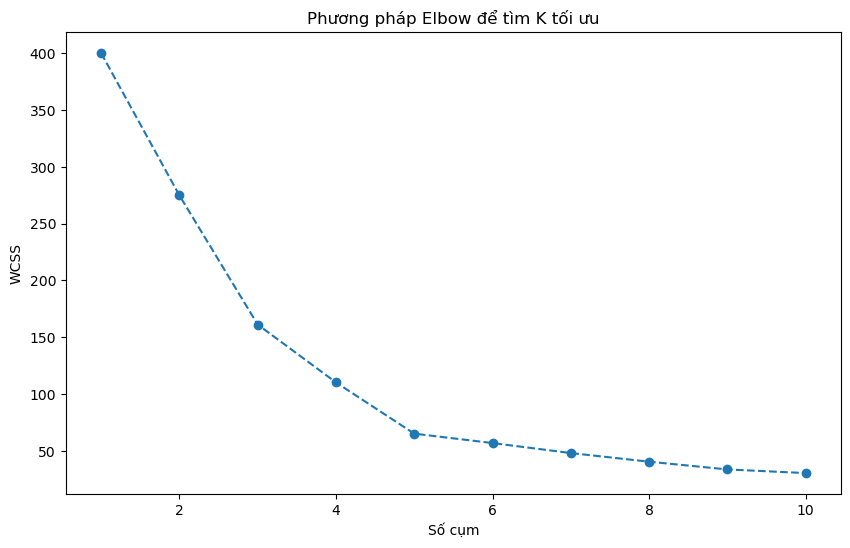

In [41]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=5, batch_size=4096)  # Tăng batch_size

wcss = []  # Khởi tạo danh sách cho WCSS  
k_range = range(1, 11)  

for k in k_range:  
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)  
    kmeans.fit(X_scaled)  
    wcss.append(kmeans.inertia_)  

# Vẽ Elbow Curve  
plt.figure(figsize=(10, 6))  
plt.plot(k_range, wcss, marker="o", linestyle="--")  
plt.xlabel("Số cụm")  
plt.ylabel("WCSS")  
plt.title("Phương pháp Elbow để tìm K tối ưu")  
plt.savefig("c:/users/quang/Customer-Segmentation/reports/figures/elbow_method.png")  
plt.show()